<a href="https://colab.research.google.com/github/AlaaElshorbagy/AutoML_Kaggle_competition/blob/main/Challenge_Via_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --pre pycaret
!pip install "schemdraw<0.16" #<-- To handle dependency issues

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB

In [ ]:
# for some model interpretation functions
!pip install interpret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 6.1 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=dc77c04ba98d2f2a0d6962aed8b7551767f9f92fa47f0f622d8

In [ ]:
from pycaret.utils import version
version()

'3.0.2'

# Load Dep. and Data

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px

plt.rcParams["figure.figsize"] = (10, 10)  # Change matplotlib Box Size
plt.rcParams["font.size"] = 14  # Change matplotlib Font Size
plt.style.use("fivethirtyeight")

## load Data

In [ ]:
#dfX_train
orig_url_train='https://drive.google.com/file/d/1IzOv1hhoKPlvVpEsq-0WoKDMVx9DFH_p/view?usp=sharing'
file_id_train = orig_url_train.split('/')[-2]
dwn_url_train='https://drive.google.com/uc?export=download&id=' + file_id_train
#dfY_target
orig_url_target='https://drive.google.com/file/d/1QkIXMPcC4q3IutgjbicqinC_3Ap-f8GT/view?usp=sharing'
file_id_target = orig_url_target.split('/')[-2]
dwn_url_target='https://drive.google.com/uc?export=download&id=' + file_id_target
#dfX_test
orig_url_test='https://drive.google.com/file/d/1P9z9vRZQx8j_n74RLxS9aFjwqQJvhXiT/view?usp=sharing'
file_id_test = orig_url_test.split('/')[-2]
dwn_url_test='https://drive.google.com/uc?export=download&id=' + file_id_test


In [ ]:
dfX_train = pd.read_csv(dwn_url_train)
dfX_train.drop(columns=['Id'], inplace = True)
dfY_target = pd.read_csv(dwn_url_target)
dfY_target.drop(columns=['Id'], inplace = True)
dfX_test = pd.read_csv(dwn_url_test)
dfX_test.drop(columns=['Id'], inplace = True)

In [ ]:
dfX_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,2.311705,0.445665,7.020637,1.582505,3.010977,1.375501,29.897623,2.886738,-8.641869,0.414074,...,0.642797,0.706869,0.997519,1.270321,0.109460,2.829606,-8.292344,1.423754,0.090224,2.006436
1,0.580430,0.200428,22.176950,0.479475,0.173418,0.106690,-28.162402,5.388960,-9.188298,1.203232,...,1.966491,0.330869,0.449754,0.257662,-1.131653,-0.908362,20.468617,1.146844,0.142068,0.373541
2,0.042687,0.641976,1.663984,0.998398,1.262488,0.784453,-22.016388,1.512673,-3.526049,0.176904,...,0.897811,0.610529,0.158270,5.695307,0.358590,-8.164399,0.596139,0.522287,0.832107,4.264087
3,0.060388,1.408700,92.827212,2.691115,0.645211,0.710104,12.132919,1.606096,-0.782570,3.147786,...,1.375550,0.708163,0.537862,1.357389,-1.659754,-1.105801,-6.426477,0.404628,0.452828,1.106436
4,1.045148,0.704313,4.823582,0.546102,0.397827,0.606078,-11.135888,0.639788,-9.182691,0.841208,...,10.556016,0.225400,0.672425,0.257381,-0.435355,7.744958,10.908781,4.413541,0.782079,0.279165


In [ ]:
dfY_target.head(5)

,Expected
0,0
1,0
2,2
3,1
4,2


In [ ]:
dfY_target.value_counts()

Expected
2           3365
0           3341
1           3294
dtype: int64

In [ ]:
dfX_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
count,1.000000e+04,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.000206e+00,1.653294,1.323895e+01,1.631063,1.004520e+00,1.011949e+00,0.520059,1.657632,-0.002513,1.671704,...,1.648705,0.497571,0.493227,1.635187,-0.000071,-0.026737,0.013010,1.620603,0.503886,1.667950
std,1.423822e+00,2.278088,1.870323e+01,2.040002,1.409997e+00,1.444751e+00,31.791384,2.116264,10.060025,2.251833,...,2.188790,0.285955,0.290153,1.975617,0.997596,10.082855,9.968787,2.117979,0.285662,2.203032
min,1.282517e-08,0.024358,7.274511e-07,0.020518,3.379589e-11,1.348884e-07,-129.141171,0.019514,-37.427526,0.028163,...,0.022037,0.000128,0.000217,0.016691,-3.885360,-34.580159,-40.925480,0.016396,0.000139,0.029379
25%,1.040056e-01,0.509503,1.318718e+00,0.512428,1.042731e-01,1.005381e-01,-21.037225,0.507242,-6.698098,0.512798,...,0.510389,0.252094,0.241741,0.511563,-0.677989,-6.804569,-6.904905,0.504073,0.260493,0.513686
50%,4.602140e-01,0.995946,6.109321e+00,0.994325,4.558152e-01,4.490724e-01,0.351341,0.998968,0.081728,0.996833,...,0.990977,0.496045,0.488491,0.999822,-0.006377,-0.109698,0.155250,1.002604,0.503294,1.003636
75%,1.295762e+00,1.943914,1.758705e+01,1.933788,1.339252e+00,1.336866e+00,21.714889,1.982386,6.818884,1.984666,...,1.944777,0.744041,0.747421,1.988738,0.669345,6.765366,6.820834,1.932612,0.748390,1.941041
max,1.601254e+01,72.033830,2.681004e+02,33.933547,1.684319e+01,1.812245e+01,118.399310,37.265489,38.392229,45.191073,...,36.698799,0.999973,0.999895,26.936000,3.737129,36.371289,34.679957,44.943499,0.999985,45.467996


In [ ]:
df = pd.concat([dfX_train, dfY_target], axis=1)

In [ ]:
X_train = df.drop(columns=['Expected'], axis=1)
y_train = df['Expected']
X_train.shape, y_train.shape

((10000, 120), (10000,))

# Classifier Selection

In [ ]:
from pycaret.classification import *

clf = setup(data=pd.concat([X_train, y_train], axis=1),
            target = 'Expected',
            session_id=13,
            experiment_name='K_1',
            n_jobs=-1)

,Description,Value
0,Session id,13
1,Target,Expected
2,Target type,Multiclass
3,Original data shape,"(10000, 121)"
4,Transformed data shape,"(10000, 121)"
5,Transformed train set shape,"(7000, 121)"
6,Transformed test set shape,"(3000, 121)"
7,Numeric features,120
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# check the original data going into Pycaret
X_tr = get_config('X_train')
X_tr.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
248,1.418354,0.537441,9.465590,1.084828,0.807980,0.637556,-22.337925,0.495430,3.702352,0.620110,...,2.989340,0.258485,0.954772,0.173839,-2.057863,-13.057017,-6.362499,0.328932,0.901204,0.473525
8967,2.778106,0.425453,7.804626,2.231802,0.003245,3.937754,40.864658,0.763026,-17.386829,13.879006,...,0.072209,0.683596,0.002928,0.392508,1.858018,-4.576603,7.087298,0.682887,0.067042,3.624711
167,0.061704,1.083822,4.293750,0.272292,5.476833,0.000029,-17.936832,5.223540,0.123340,5.161659,...,1.073665,0.406955,0.339231,0.756585,0.099353,-11.315671,-1.894740,0.322643,0.090457,0.609181
3173,1.235983,2.407783,0.000178,0.176536,0.067521,0.040063,-19.671253,0.178734,2.245178,0.530705,...,0.723053,0.638524,0.204202,0.300772,0.608951,-4.885789,21.718481,1.815937,0.020050,3.212007
5612,0.406432,3.012671,54.491268,1.021979,0.205293,1.458208,36.836414,1.061862,-0.673298,0.158301,...,1.353032,0.417530,0.165698,2.898039,2.246175,-16.029930,8.616494,2.531608,0.875082,27.019632


In [ ]:
# check how pycaret transforms the data
X_tr2 = get_config('X_train_transformed')
X_tr2.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
248,1.418354,0.537441,9.465590,1.084828,0.807980,0.637556,-22.337925,0.495430,3.702352,0.620110,...,2.989340,0.258485,0.954772,0.173839,-2.057863,-13.057017,-6.362499,0.328932,0.901204,0.473525
8967,2.778106,0.425453,7.804626,2.231802,0.003245,3.937754,40.864658,0.763026,-17.386829,13.879006,...,0.072209,0.683596,0.002928,0.392508,1.858018,-4.576603,7.087298,0.682887,0.067042,3.624711
167,0.061704,1.083822,4.293750,0.272292,5.476833,0.000029,-17.936832,5.223540,0.123340,5.161659,...,1.073665,0.406955,0.339231,0.756585,0.099353,-11.315671,-1.894740,0.322643,0.090457,0.609181
3173,1.235983,2.407783,0.000178,0.176536,0.067521,0.040063,-19.671253,0.178734,2.245178,0.530705,...,0.723053,0.638524,0.204202,0.300772,0.608951,-4.885789,21.718481,1.815937,0.020050,3.212007
5612,0.406432,3.012671,54.491268,1.021979,0.205293,1.458208,36.836414,1.061862,-0.673298,0.158301,...,1.353032,0.417530,0.165698,2.898039,2.246175,-16.029930,8.616494,2.531608,0.875082,27.019632


In [ ]:
best_model = compare_models(fold=5, sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.5730,0.7564,0.5730,0.5727,0.5725,0.3596,0.3598,6.1340
xgboost,Extreme Gradient Boosting,0.5417,0.7352,0.5417,0.5414,0.5415,0.3126,0.3126,48.6100
gbc,Gradient Boosting Classifier,0.5410,0.7293,0.5410,0.5413,0.5402,0.3116,0.3122,72.3600
rf,Random Forest Classifier,0.5166,0.7009,0.5166,0.5168,0.5163,0.2749,0.2751,5.9680
et,Extra Trees Classifier,0.5006,0.6815,0.5006,0.5007,0.4995,0.2509,0.2515,1.8900
qda,Quadratic Discriminant Analysis,0.4800,0.6547,0.4800,0.4800,0.4799,0.2200,0.2200,0.3800
lr,Logistic Regression,0.4774,0.6556,0.4774,0.4767,0.4762,0.2163,0.2167,5.3020
ridge,Ridge Classifier,0.4777,0.0000,0.4777,0.4770,0.4751,0.2168,0.2179,0.1080
lda,Linear Discriminant Analysis,0.4751,0.6545,0.4751,0.4746,0.4735,0.2129,0.2135,0.3340
ada,Ada Boost Classifier,0.4686,0.6588,0.4686,0.4682,0.4673,0.2031,0.2035,4.7840


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
lightgbm = create_model('lightgbm', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5693,0.7495,0.5693,0.5690,0.5689,0.3540,0.3541
1,0.5771,0.7585,0.5771,0.5771,0.5769,0.3657,0.3659
2,0.5621,0.7460,0.5621,0.5618,0.5616,0.3433,0.3436
3,0.5586,0.7573,0.5586,0.5580,0.5582,0.3379,0.3380
4,0.5979,0.7709,0.5979,0.5974,0.5971,0.3969,0.3972
Mean,0.5730,0.7564,0.5730,0.5727,0.5725,0.3596,0.3598
Std,0.0140,0.0086,0.0140,0.0140,0.0139,0.0210,0.0210


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lightgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=13, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
tuned_lightgbm = tune_model(lightgbm,
                      n_iter=16,
                      search_library='scikit-learn',
                      search_algorithm='random',
                      custom_grid={
                          'num_leaves': [80, 800,], #20_000],# 2**20],
                          'max_depth': [7,10, 15, 20, None],
                          'min_data_in_leaf': [100, 500]#, 1000]
                      },
                      optimize='f1',
                      fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5686,0.7499,0.5686,0.5683,0.5682,0.3529,0.3531
1,0.5650,0.7605,0.5650,0.5645,0.5646,0.3475,0.3476
2,0.5729,0.7537,0.5729,0.5729,0.5729,0.3593,0.3593
3,0.5743,0.7573,0.5743,0.5744,0.5743,0.3614,0.3614
4,0.5921,0.7716,0.5921,0.5929,0.5921,0.3882,0.3885
Mean,0.5746,0.7586,0.5746,0.5746,0.5744,0.3619,0.3620
Std,0.0094,0.0074,0.0094,0.0098,0.0095,0.0141,0.0141


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [ ]:
tuned_lightgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=15,
               min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=100, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=80, objective=None, random_state=13,
               reg_alpha=0.0, reg_lambda=0.0, silent='warn', subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

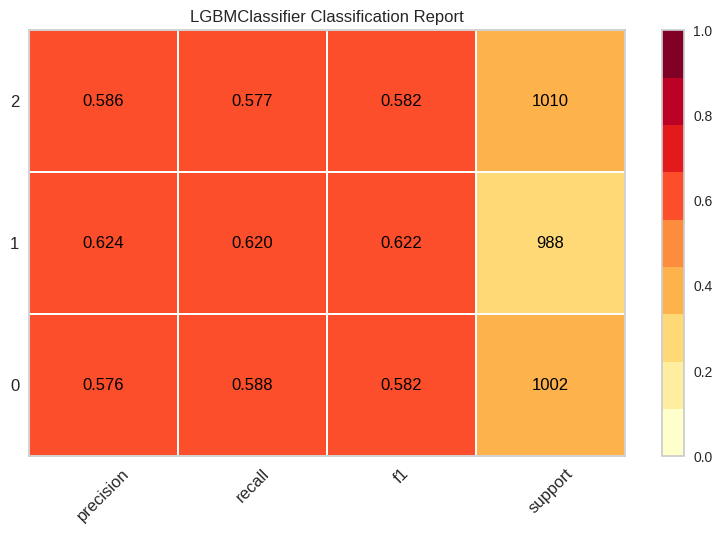

In [ ]:
plot_model(tuned_lightgbm, plot='class_report')

In [ ]:
(0.582+0.622+0.582)/3

0.5953333333333334

In [ ]:
predict_model(tuned_lightgbm) # check performance on the 30% held out data from train

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.5950,0.7741,0.5950,0.5951,0.5950,0.3925,0.3925


,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,Expected,prediction_label,prediction_score
6583,0.664162,1.565712,23.692789,3.800625,0.079239,0.184571,-32.654552,1.299648,-7.466593,0.693614,...,5.704206,-2.050034,-16.622120,14.523914,0.848333,0.504023,5.091907,0,1,0.3567
6820,2.368190,3.203856,80.688362,1.962697,0.084720,0.000815,-19.396099,0.515157,3.929940,0.707024,...,1.622177,-1.020230,-4.931423,16.036240,4.075531,0.936438,0.601893,2,2,0.8902
1250,0.210784,0.170378,66.977699,3.490105,1.500426,1.501863,47.254456,0.488247,-2.521952,0.267242,...,0.456896,0.447304,12.890458,6.531042,0.488319,0.015257,1.772169,1,2,0.5738
8154,1.704935,0.231418,34.508522,2.094253,0.055986,1.750367,82.097275,0.451312,-4.731057,0.283324,...,0.878423,-1.319269,2.904654,-2.069114,0.754866,0.762044,0.602519,2,2,0.4419
9617,0.413021,1.730301,13.128679,0.290088,0.306842,0.008942,-19.490881,0.565865,7.753597,1.565677,...,3.514258,-0.412204,-1.862453,0.833155,0.920876,0.405994,0.405198,0,0,0.7271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8844,0.306365,1.161567,5.361080,2.446389,0.925940,3.405239,-32.542892,0.373065,-3.387007,0.160412,...,0.841481,0.474166,-3.170945,-0.032852,0.474540,0.556176,0.204435,1,0,0.5940
7723,0.041497,0.859753,60.646183,1.679682,0.831710,0.547242,9.012782,6.236426,-16.323118,0.974829,...,1.829275,0.085863,5.489456,-16.415384,1.457001,0.336714,1.238498,2,2,0.4323
3140,0.391026,0.803137,29.751760,0.197235,2.213656,0.757444,-42.132862,0.175150,7.206724,0.231585,...,0.318410,-0.634304,15.429552,-5.560746,0.951493,0.805755,0.181426,2,0,0.3976
8428,1.039239,2.946824,52.431870,0.959047,0.815660,0.162315,12.754313,0.172158,-7.193349,0.905190,...,8.004750,1.354095,10.922596,-12.617180,0.777878,0.172143,0.171881,1,0,0.8758


# Feature Selection

In [ ]:
#plot_model(tuned_lightgbm, plot='feature')

In [ ]:
#evaluate_model(tuned_lightgbm)

In [ ]:
#interpret_model(tuned_lightgbm, plot='summary')

In [ ]:
feature_imp = pd.DataFrame({'Value':tuned_lightgbm.feature_importances_,'Feature':X_tr2.columns})

In [ ]:
new_feature = feature_imp.sort_values(by='Value', ascending=False).Feature.values[:20]
new_feature

array(['37', '98', '24', '42', '6', '61', '72', '20', '11', '50', '60',
       '86', '74', '87', '62', '2', '34', '63', '13', '17'], dtype=object)

In [ ]:
df = df[["37","98","24","42","6","61", "72","20","11","50","60",
         "86","74","87","62","2","34","63", 'Expected']]

In [ ]:
X_train = df.drop(columns=['Expected'], axis=1)
y_train = df['Expected']

In [ ]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from  lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [ ]:
LGB_c = LGBMClassifier(max_depth=10, min_data_in_leaf=100, num_leaves=800,
               random_state=13)

In [ ]:
pipeline = Pipeline([#("data_scaling", PowerTransformer()),
                           ("estimator", LGB_c)])
np.mean(cross_val_score(pipeline, X_train, y_train, cv=5, scoring= 'f1_macro'))

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100


0.6697395302617448

In [ ]:
from sklearn.model_selection import  GridSearchCV
def RGS(X, Y, model_, parm_, cv_ = 5):
  '''it takes the attributes in GridSearchCV
  return: best_estimator, best_score, best_parameters
   '''
  grid_obj = GridSearchCV(model_, parm_, cv=cv_ )
  grid_obj = grid_obj.fit(X, Y)
  best_estimator = grid_obj.best_estimator_ # Set best_estimator to the best combination of parameters
  best_score = grid_obj.best_score_ # avg cv_ -fold CV accuracy score of the best tuned model
  best_param = grid_obj.best_params_

  return best_estimator, best_score, best_param

parameters = {
                          'num_leaves': [50,80,120], #20_000],# 2**20],
                          'max_depth': [ 20,30,40],
                          'min_data_in_leaf': [50,100,200]#, 1000]
                      }
BE,BS,BP = RGS(X_train, y_train, LGB_c, parameters)

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min

In [ ]:
BS

0.6759000000000001

In [ ]:
BE

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=30,
               min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=50, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=120, objective=None, random_state=13,
               reg_alpha=0.0, reg_lambda=0.0, silent='warn', subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [ ]:
#using GridSearch
LGB_c = LGBMClassifier(max_depth=30, min_data_in_leaf=50, num_leaves=120,
               random_state=13)

In [ ]:
pipeline = Pipeline([#("data_scaling", PowerTransformer()),
                           ("estimator", LGB_c)])
np.mean(cross_val_score(pipeline, X_train, y_train, cv=5, scoring= 'f1_macro'))

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50


0.6760147688138571

In [ ]:
pipeline.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50


Pipeline(memory=None,
         steps=[('estimator',
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=30,
                                min_child_samples=20, min_child_weight=0.001,
                                min_data_in_leaf=50, min_split_gain=0.0,
                                n_estimators=100, n_jobs=-1, num_leaves=120,
                                objective=None, random_state=13, reg_alpha=0.0,
                                reg_lambda=0.0, silent='warn', subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

In [ ]:
X_test = dfX_test[["37","98","24","42","6","61", "72","20","11","50","60",
         "86","74","87","62","2","34","63"]]
y_pred = pipeline.predict(X_test)
df_y = pd.DataFrame({'Predicted':y_pred})
df_y.to_csv('dfy.csv')

The macro-F1 declined a lot! on the Test data. I got 0.48158

# Scalling features

In [ ]:
from sklearn.preprocessing import  PowerTransformer

In [ ]:
pipeline = Pipeline([("data_scaling", PowerTransformer()),
                           ("estimator", LGB_c)])
np.mean(cross_val_score(pipeline, X_train, y_train, cv=5, scoring= 'f1_macro'))

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50


0.6346139079926445

In [ ]:
#pipeline.fit(X_train, y_train)
#y_pred = pipeline.predict(X_test)
#df_y = pd.DataFrame({'Predicted':y_pred})
#df_y.to_csv('dfy.csv')

# Remove outliers

In [ ]:
from scipy import stats #to use z-score to remove outliers

In [ ]:
#to remove outliers we use z-score
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df = df.reset_index()
df = df.drop("index", axis=1)
print(df.shape)

(7277, 19)


In [ ]:
X_train = df.drop(columns=['Expected'], axis=1)
y_train = df['Expected']

In [ ]:
pipeline = Pipeline([#("data_scaling", PowerTransformer()),
                           ("estimator", LGB_c)])
np.mean(cross_val_score(pipeline, X_train, y_train, cv=5, scoring= 'f1_macro'))

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50


0.633825248539963

I don't know why the f1-macro droped again

In [ ]:
#pipeline.fit(X_train, y_train)
#y_pred = pipeline.predict(X_test)
#df_y = pd.DataFrame({'Predicted':y_pred})
#df_y.to_csv('dfy.csv')